## 『本次練習內容』
#### 計算 Bounding Box Regression Loss

## 『本次練習目的』
  #### 了解Proposal 與 標註框之間的轉換
  #### 這裡希望學員清楚理解我們要預測的不是實際的(x,y,w,h)，而是他們相對應的偏置量

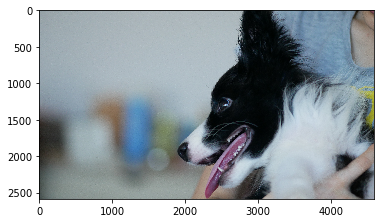

In [3]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

##讀入照片
image=cv2.imread(os.path.join("Part01", 'Dog.JPG'))

##因為CV2會將照片讀成BGR，要轉回來
original_image=image[:,:,::-1]
plt.imshow(original_image)

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [5]:
Ground_Truth_BBOX=[1900,700,1800,1800]
"Region_Proposal"=[1800,800,1500,1500]

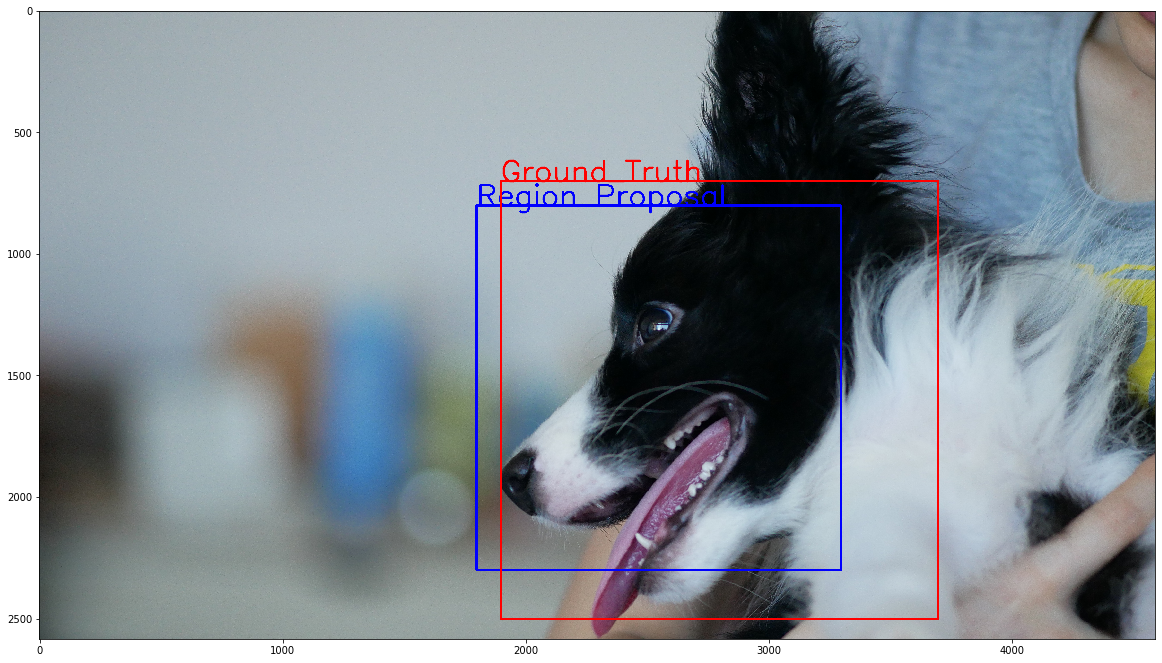

In [30]:
img = original_image.copy()

plt.figure(figsize=(20,15))

cv2.rectangle(img, (Region_Proposal[0], Region_Proposal[1]), 
              (Region_Proposal[0]+Region_Proposal[2], Region_Proposal[1]+Region_Proposal[3]), (0, 0, 255), 8)
cv2.putText(img, "Region_Proposal", (Region_Proposal[0], Region_Proposal[1]), cv2.FONT_HERSHEY_SIMPLEX , 4 , (0, 0, 255), 8, cv2.LINE_AA)

cv2.rectangle(img, (Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]), 
              (Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2], Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]), (255, 0, 0), 8 )
cv2.putText(img, "Ground_Truth", (Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]), cv2.FONT_HERSHEY_SIMPLEX , 4 , (255, 0, 0), 8, cv2.LINE_AA)
plt.imshow(img)


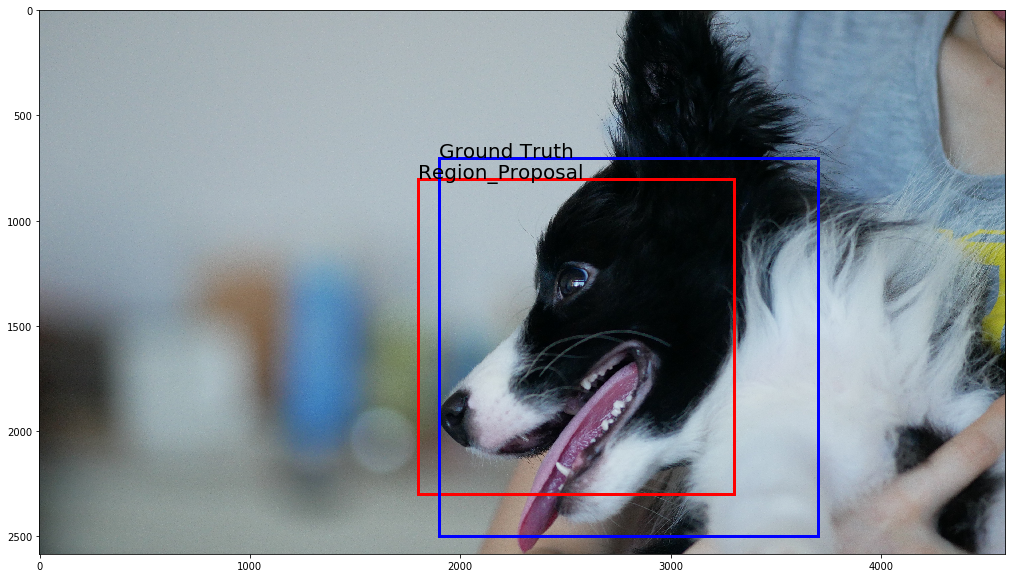

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Region_Proposal[0],Region_Proposal[1]),Region_Proposal[2],Region_Proposal[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Region_Proposal',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 計算ti，按照公式寫

In [32]:
tx=(Ground_Truth_BBOX[0]-Region_Proposal[0])/Region_Proposal[2]
ty=(Ground_Truth_BBOX[1]-Region_Proposal[1])/Region_Proposal[3]
tw=np.log(Ground_Truth_BBOX[2]/Region_Proposal[2])
th=np.log(Ground_Truth_BBOX[3]/Region_Proposal[3])

In [33]:
print('x偏移量： ',tx)
print('y偏移量： ',ty)
print('w縮放量： ',tw)
print('h縮放量： ',th)

x偏移量：  0.06666666666666667
y偏移量：  -0.06666666666666667
w縮放量：  0.1823215567939546
h縮放量：  0.1823215567939546


## 假設Predict值 dx,dy,dw,dh

In [1]:
dx,dy,dw,dh=[0.05,-0.05,0.12,0.17]

In [ ]:
Loss=np.sum(np.square(np.array('''要該填入什麼值？''')-np.array('''要該填入什麼值？''')))

In [21]:
print('Loss值：',Loss)

Loss值： 0.004591352758604312


In [34]:
##預測偏移縮放
T= np.array( [(Ground_Truth_BBOX[0]-Region_Proposal[0])/Region_Proposal[2], 
              (Ground_Truth_BBOX[1]-Region_Proposal[1])/Region_Proposal[3], 
              np.log(Ground_Truth_BBOX[2]/Region_Proposal[2]), 
              np.log(Ground_Truth_BBOX[3]/Region_Proposal[3])] )

## 實際偏移縮放
D = np.array([0.05,-0.05,0.12,0.17])

loss = np.sum(np.square(D-T))
print(loss)

0.004591352758604312
